In [ ]:
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [ ]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

print(data_dir)

228813984/228813984 [==============================] - 6s 0us/step
./datasets/flower_photos


In [ ]:
type(data_dir)

str

In [ ]:
import pathlib

data_dir = pathlib.Path(data_dir)

data_dir

PosixPath('datasets/flower_photos')

In [ ]:
# get roses pictures
roses = data_dir.glob("roses/*")
list(roses)

[PosixPath('datasets/flower_photos/roses/17302463621_d82be11f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4900231976_f8ced2b42a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3663244576_97f595cf4a.jpg'),
 PosixPath('datasets/flower_photos/roses/15922772266_1167a06620.jpg'),
 PosixPath('datasets/flower_photos/roses/6969041818_a505baa68e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4396642388_3081a38875_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3560426426_1c66cb8330.jpg'),
 PosixPath('datasets/flower_photos/roses/8644003462_2272de26eb.jpg'),
 PosixPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12562723334_a2e0a9e3c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/568715474_bdb64ccc32.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3141434519_aaa64c4f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1756973583_4aac7df00d_m.jpg'),
 

In [ ]:
# create dictionary for flowers and list of images' paths
flower_images_dict = {
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'roses':list(data_dir.glob('roses/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [ ]:
type()

In [ ]:
# read the image
img_read = cv2.imread(str(flower_images_dict['roses'][2]))

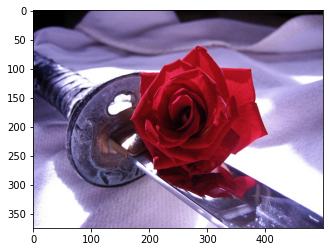

In [ ]:
# display the image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB))

In [ ]:
flower_labels = {
  'roses': 0,
  'daisy': 1,
  'dandelion': 2,
  'sunflowers': 3,
  'tulips': 4
}

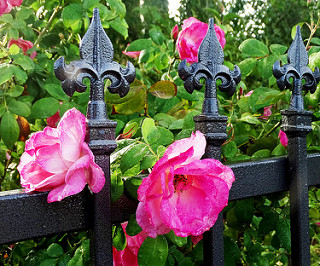

In [ ]:
import PIL

PIL.Image.open(str(flower_images_dict['roses'][0]))

In [ ]:
# create x and y
x = []
y = []

IMAGES_PER_CLASS=min([len(images) for flower, images in flower_images_dict.items()])
IMAGES_PER_CLASS

633

In [ ]:
for flower, images in flower_images_dict.items():
  for i, img_path in enumerate(images): 
    img_path = str(img_path)
    if i<IMAGES_PER_CLASS:
      #  read the image and resize it
        img_read = cv2.imread(img_path)
        img_resized = cv2.resize(img_read, (180, 180))
        img_scaled = img_resized/255
        x.append(img_scaled)
        y.append(flower_labels[flower])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x.shape

(3165, 180, 180, 3)

In [ ]:
y.shape

(3165,)

In [ ]:
x[0]

array([[[0.29411765, 0.38823529, 0.32156863],
        [0.29019608, 0.4       , 0.32941176],
        [0.29411765, 0.40392157, 0.3254902 ],
        ...,
        [0.21960784, 0.21960784, 0.19607843],
        [0.21960784, 0.21568627, 0.2       ],
        [0.21568627, 0.21568627, 0.19215686]],

       [[0.29411765, 0.39607843, 0.3254902 ],
        [0.29803922, 0.4       , 0.32941176],
        [0.29019608, 0.42352941, 0.32941176],
        ...,
        [0.21568627, 0.21176471, 0.2       ],
        [0.22352941, 0.21960784, 0.19607843],
        [0.21568627, 0.21568627, 0.19607843]],

       [[0.30588235, 0.41960784, 0.32941176],
        [0.30588235, 0.41568627, 0.34117647],
        [0.28627451, 0.42745098, 0.34901961],
        ...,
        [0.22352941, 0.21568627, 0.20784314],
        [0.21960784, 0.21568627, 0.2       ],
        [0.21960784, 0.21960784, 0.20392157]],

       ...,

       [[0.24705882, 0.31764706, 0.29019608],
        [0.25490196, 0.30980392, 0.2745098 ],
        [0.25490196, 0

In [ ]:
# split into train and test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(2532, 180, 180, 3) (2532,)
(633, 180, 180, 3) (633,)


In [ ]:
# modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D((4, 4)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D((4, 4)),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D((4, 4)),
    # flatten
    Flatten(),
    # Dense layers
    Dense(128, activation='relu'),
    Dense(5, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain, ytrain, epochs=30)

Epoch 1/30
80/80 [==============================] - 42s 522ms/step - loss: 0.0512 - accuracy: 0.9909
Epoch 2/30
80/80 [==============================] - 35s 435ms/step - loss: 0.0446 - accuracy: 0.9909
Epoch 3/30
80/80 [==============================] - 39s 484ms/step - loss: 0.0606 - accuracy: 0.9842
Epoch 4/30
80/80 [==============================] - 35s 443ms/step - loss: 0.0485 - accuracy: 0.9870
Epoch 6/30
80/80 [==============================] - 35s 438ms/step - loss: 0.1147 - accuracy: 0.9601
Epoch 7/30
80/80 [==============================] - 36s 446ms/step - loss: 0.1242 - accuracy: 0.9609
Epoch 8/30
80/80 [==============================] - 36s 452ms/step - loss: 0.0672 - accuracy: 0.9775
Epoch 9/30
80/80 [==============================] - 36s 454ms/step - loss: 0.0220 - accuracy: 0.9968
Epoch 10/30
80/80 [==============================] - 36s 449ms/step - loss: 0.0188 - accuracy: 0.9972
Epoch 11/30
80/80 [==============================] - 36s 453ms/step - loss: 0.0133 - accur

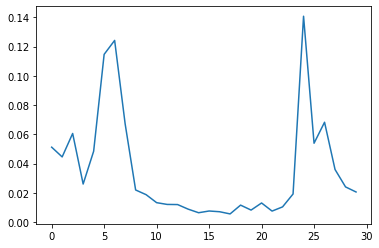

In [ ]:
plt.plot(history.history['loss'])

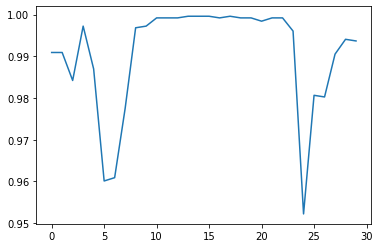

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
model.evaluate(xtest, ytest)

20/20 [==============================] - 4s 161ms/step - loss: 1.5234 - accuracy: 0.7425


[1.5233794450759888, 0.7424960732460022]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(xtest)

20/20 [==============================] - 3s 156ms/step


In [ ]:
predictions.shape

(633, 5)

In [ ]:
predictions_label = [np.argmax(i) for i in predictions]

print(predictions_label)


[2, 2, 3, 1, 1, 1, 2, 3, 3, 0, 1, 2, 1, 3, 3, 1, 3, 2, 1, 2, 0, 3, 0, 1, 0, 2, 1, 1, 4, 0, 4, 1, 3, 2, 3, 1, 4, 1, 4, 0, 1, 4, 1, 1, 0, 0, 1, 4, 1, 0, 3, 3, 0, 1, 0, 2, 0, 0, 2, 3, 0, 0, 4, 0, 4, 0, 0, 4, 0, 1, 4, 0, 3, 2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 3, 3, 3, 1, 4, 2, 1, 4, 3, 1, 3, 0, 3, 4, 3, 2, 3, 2, 1, 0, 3, 4, 3, 3, 3, 3, 0, 1, 1, 0, 0, 0, 0, 1, 3, 3, 4, 1, 1, 1, 4, 2, 1, 0, 2, 0, 4, 3, 2, 1, 1, 3, 4, 3, 0, 1, 1, 1, 0, 3, 4, 0, 0, 3, 3, 0, 4, 0, 0, 4, 2, 2, 0, 2, 0, 3, 1, 4, 1, 1, 1, 1, 4, 2, 4, 4, 2, 4, 3, 3, 2, 4, 3, 4, 3, 0, 2, 0, 4, 4, 2, 0, 4, 1, 1, 1, 0, 1, 4, 2, 0, 4, 1, 2, 1, 2, 0, 1, 3, 3, 2, 0, 1, 0, 2, 0, 4, 2, 1, 1, 3, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 4, 1, 1, 2, 2, 2, 0, 1, 0, 4, 1, 3, 0, 0, 3, 2, 4, 0, 3, 0, 0, 3, 1, 0, 0, 4, 1, 0, 4, 4, 2, 2, 2, 1, 0, 4, 0, 2, 4, 3, 3, 4, 4, 1, 0, 1, 3, 3, 0, 1, 4, 1, 3, 0, 0, 3, 1, 4, 4, 3, 3, 4, 3, 1, 2, 0, 4, 1, 1, 0, 0, 3, 4, 1, 1, 3, 2, 1, 4, 1, 2, 1, 4, 2, 0, 4, 3, 1, 0, 4, 0, 0, 0, 4, 4, 3, 3, 4, 4, 4, 1, 1, 

In [ ]:
# print and display confusion matrix
cm = confusion_matrix(ytest, predictions_label)

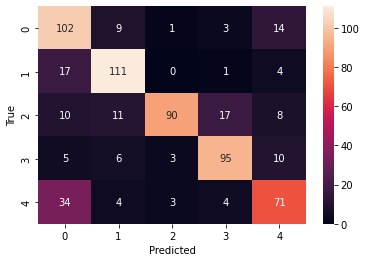

In [ ]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print(classification_report(ytest, predictions_label))

              precision    recall  f1-score   support

           0       0.61      0.79      0.69       129
           1       0.79      0.83      0.81       133
           2       0.93      0.66      0.77       136
           3       0.79      0.80      0.79       119
           4       0.66      0.61      0.64       116

    accuracy                           0.74       633
   macro avg       0.76      0.74      0.74       633
weighted avg       0.76      0.74      0.74       633



##Data Augmentation

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import RandomContrast, RandomZoom, RandomRotation, RandomCrop
data_augmentation = Sequential([
    RandomZoom(0.6),
    RandomRotation(0.9),
    RandomContrast(0.5)
])

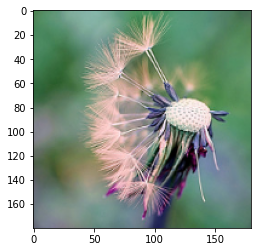

In [ ]:
plt.imshow(xtest[0])

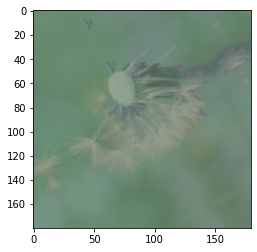

In [ ]:
plt.imshow(data_augmentation(xtest)[0])

In [ ]:
model2 = Sequential([
    data_augmentation,
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D((4, 4)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D((4, 4)),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D((4, 4)),
    # flatten
    Flatten(),
    # Dense layers
    Dense(128, activation='relu'),
    Dense(5, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(xtrain, ytrain, epochs=30)

Epoch 1/30


80/80 [==============================] - 55s 593ms/step - loss: 1.4138 - accuracy: 0.3705
Epoch 2/30
80/80 [==============================] - 62s 776ms/step - loss: 1.1713 - accuracy: 0.5032
Epoch 3/30
80/80 [==============================] - 48s 596ms/step - loss: 1.1157 - accuracy: 0.5434
Epoch 4/30
80/80 [==============================] - 47s 594ms/step - loss: 1.0459 - accuracy: 0.5707
Epoch 5/30
80/80 [==============================] - 50s 623ms/step - loss: 1.0125 - accuracy: 0.5746
Epoch 6/30
80/80 [==============================] - 49s 619ms/step - loss: 1.0020 - accuracy: 0.5881
Epoch 7/30
80/80 [==============================] - 53s 667ms/step - loss: 0.9489 - accuracy: 0.6209
Epoch 8/30
80/80 [==============================] - 49s 604ms/step - loss: 0.9413 - accuracy: 0.6212
Epoch 9/30
80/80 [==============================] - 48s 600ms/step - loss: 0.9145 - accuracy: 0.6319
Epoch 10/30
80/80 [==============================] - 48s 602ms/step - loss: 0.8906 - accuracy: 0.6469


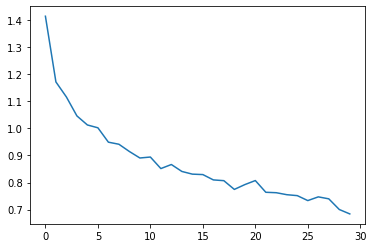

In [ ]:
plt.plot(history2.history['loss'])

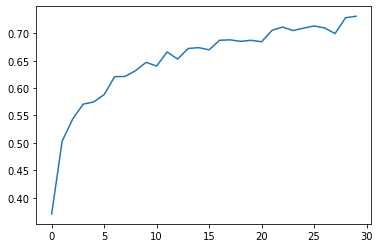

In [ ]:
plt.plot(history2.history['accuracy'])

In [ ]:
model2.evaluate(xtest, ytest)

20/20 [==============================] - 4s 199ms/step - loss: 0.7046 - accuracy: 0.7204


[0.704570472240448, 0.7203791737556458]

In [ ]:
predictions2 = model2.predict(xtest)

predictions_label2 = [np.argmax(i) for i in predictions2]

# print(predictions_label)

20/20 [==============================] - 4s 182ms/step


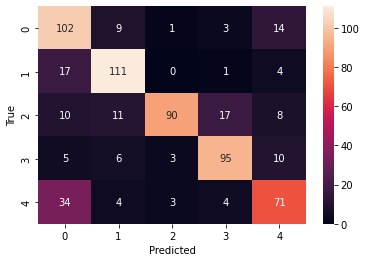

In [ ]:
# print and display confusion matrix
cm2 = confusion_matrix(ytest, predictions_label2)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()